In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
%reload_ext autoreload
%autoreload 2

# The acoustics equation (or two-way wave equation)

<hr style="border-width:4px; border-color:coral"></hr>

The acoustics equations is one of the simplest examples of a hyperbolic system of PDEs.  In general, a hyperbolic system can be written as a matrix system, where  the eigenvalues of the $n \times n$ matrix $A$ are all real, and that the eigenvectors span $\mathcal R^n$.  These $n$ eigenvectors $\mathbf r^p$ can be interpreted as "waves", which move with speeds given by their associated eigenvalues $\lambda^p$.  

For the wave propagation algorithm, we need to define a Riemann solver that can solve for "wave", "speeds" and fluctuations.  Before we can do this, however, you have to have a basic understanding of the structure of the wave equation. The problem below should give you the understanding needed to write the Riemann solver for the WPA. 


## The two way wave equation
<hr style="border-width:4px; border-color:coral"></hr>


The two-way wave equation can be used to model acoustic waves (e.g. sound waves or pressure waves) in air.  In this case, the wave equation is written in terms of pressure $p(x,t)$ ($N/m^2$) and is given by 

\begin{equation}
p_{tt} = c^2 p_{xx} = 0, \qquad -\infty < x < \infty
\end{equation}

where $c$ ($m/s$) is the speed of sound in the air.  A second quantity $u(x,t)$ ($m/s$) is the velocity of a parcel of air as it is perturbed by the pressure wave. 

A model for both the pressure and velocity can be written as a system of first order equations (e.g. containing first derivatives only), given by

\begin{eqnarray}
p_t + \rho c^2 u_x & = & 0 \\
\rho u_t + p_x & = & 0
\end{eqnarray}

where $\rho$ ($kg/m^3$) is the constant density of air.  This can be written as a *quasi-linear* system

\begin{equation}
\begin{pmatrix} p \\ u \end{pmatrix}_t + 
\begin{pmatrix} 0 &  \rho c^2 \\ \frac{1}{\rho} & 0 \end{pmatrix} 
\begin{pmatrix} p \\ u \end{pmatrix}_x =  
\begin{pmatrix} 0 \\ 0 \end{pmatrix}
\end{equation}

or more generally as
\begin{equation}
\mathbf q_t + A \mathbf q_x = 0
\end{equation}

where $\mathbf q(x,t) = (p(x,t), u(x,t))$ and $A$ is the $2 \times 2$ matrix

\begin{equation}
A = \begin{pmatrix} 0 &  \rho c^2 \\ \frac{1}{\rho} & 0 \end{pmatrix}.
\end{equation}


Analytically, we can solve this system in the following steps. 

## Problem : D'Alembert solution to the wave equation
<hr style="border-width:4px; border-color:coral"></hr>

Carry out the steps below to get the classic "D'Alembert solution" to the wave equation.

### Step 1

Find the eigenvalues $\lambda^1$ and $\lambda^2$ and eigenvectors $\mathbf r^1$ and $\mathbf r^2$ of the matrix $A$.  Order your eigenvalues so that
$\lambda^1 < \lambda^2$ and normalize your eigenvectors so that the first component of 
each eigenvector is 1. 

### Step 2
Using the eigen-decomposition of $A$ you found above,  write the vector equation for $\mathbf q$ as a de-coupled system of two "1-way" wave equations in terms of new 
variables $w^1(x,t)$ and $w^2(x,t)$, given by

<br/>

\begin{equation}
\begin{aligned}
w^1_t + \lambda^1 w^1_x & = 0 \\
w^2_t + \lambda^2 w^2_x & = 0
\end{aligned}
\label{eqn:oneway}
\end{equation}

The variables  $w^1(x,t)$ and $w^2(x,t)$ are known as *characteristic variables*. 

**Hint:** Write $A = R\Lambda R^{-1}$, where $R$ is a $2 \times 2$ matrix 
$R = [\mathbf r^1, \;  \mathbf r^2]$ and $\Lambda$ is the $2 \times 2$ diagonal matrix 
$\mbox{diag}(\lambda^1, \lambda^2)$.  Set $\mathbf w = R^{-1} \mathbf q$ and obtain a vector equation for $\mathbf w = (w^1(x,t), w^2(x,t))$. 

### Step 3

Show that the solutions to the 1-way wave equations in Step 2 are given by

<br/>

\begin{equation*}
\begin{aligned}
w^1(x,t) & = w^1(x-\lambda^1 t,0) \\
w^2(x,t) & = w^2(x-\lambda^2 t,0) \\
\end{aligned}
\label{eqn:charvar}
\end{equation*}

### Step 4

Show that the solution $\mathbf q$ is given by

<br/>

\begin{equation}
\begin{pmatrix} p(x,t) \\ u(x,t) \end{pmatrix} = 
w^1(x-\lambda^1 t,0) \mathbf r^1 + w^2(x-\lambda^2 t,0) \mathbf r^2
\label{eqn:solution}
\end{equation}

### Step 5
Show that the solution in Step 4 for $p(x,t)$ is exactly the D'Alembert solution

<br/>

\begin{equation}
p(x,t) = \frac{1}{2}\left(f(x+ct) + f(x-ct)\right)+ 
\frac{1}{2c}\int_{x-ct}^{x+ct} g(s) \; ds
\end{equation}

where $f(x) = p(x,0)$ is the initial pressure field and $g(x) = p_t(x,0)$ is initial rate of change of pressure.  

**Hint:**  Use the definition $\mathbf w = R^{-1} \mathbf q$ in 
Step 4.  Then use the first equation in  to show that the solution you get can be interpreted as a d'Alembert solution with non-zero initial conditions $g(x)$. 

### Step 6

Use the solution in Step 4 to show that $u(x,t)$ is also a d'Alembert solution. 

## Problem : Propagation of an acoustic disturbance
<hr style="border-width:4px; border-color:coral"></hr>


When we hear a sound from a distant source, the "sound" we hear is a perturbation to the background pressure field.  This sound is initiated by the air parcels being instantaneously disturbed (or "pushed") through a clap, the vibrations of a drumhead, or jet engines ejecting high velocity air. Through our model equations, this initial velocity disturbance perturbs the pressure field and a pressure wave travels with sound speed $c$, until it arrives at our eardrums.  

Although we refer to $p(x,t)$ and $u(x,t)$ as pressure and velocity, these quantities are actually pressure and velocity *perturbations* to a background atmospheric pressure and mean windfield.  With this interpretation, it makes sense to set the initial perturbation $p(x,t)$ to zero.   

For the following questions, assume that we are in an infinite domain $-\infty < x < \infty$, so we do not need to consider even and odd extensions of our initial conditions.

1. Consider an initial pressure field $p(x,0) = 0$, and an initial velocity disturbance given by

\begin{equation*}
u(x,0) = \left\{\begin{array}{rr} 
-1 & -1 < x < 0 \\
1 & 0 < x < 1\\
0 & \mbox{otherwise}
\end{array}
\right.
\end{equation*}

Set $c = \rho = 1$ and sketch (or plot) the solution for $p(x,t)$ and $u(x,t)$ at time $t = 5$.  

2. How does increasing or decreasing the density $\rho$ of the background medium affect the sound that we might hear?  How does increasing the sound speed $c$ in the medium change the sound we hear? 

In [3]:
# Global data needed for Riemann solver and initialization routine

# sound speed and  density
c = 1
rho = 1

def rp1_wave(Q_ext):
    """  Input : 
            Q_ext : Array of N+4 Q values.   Boundary conditions are included.
            
        Output : 
            waves  : Jump in Q at edges -3/2, -1/2, ..., N-1/2, N+1/2 (N+3 values total)
            speeds : Array of speeds (N+3 values)
            apdq   : Positive fluctuations (N+3 values)
            amdq   : Negative fluctuations (N+3 values)
        """    
        
    # This Riemann solver solves two-way wave equation.
        
        
    # jump in Q at each interface
    delta = Q_ext[1:,:]-Q_ext[:-1,:]
    
    # For most problems, the number of waves is equal to the number of equations
    mwaves = meqn

    # Matrix of eigenvalues
    R = array([[1, 1],[-1/(rho*c), 1/(rho*c)]])               
    
    # Vector of eigenvalues
    evals = array([-c,c])   # Vector of eigenvalues
    
    d0 = delta[:,[0]]
    d1 = delta[:,[1]]
    
    # Solve R*alpha = delta to get a1=alph[0], a2=alpha[1]
    a1 = 0.5*(d0 - rho*c*d1)
    a2 = 0.5*(d0 + rho*c*d1)
        
    # Wave and speed 1
    w1 = a1@R[:,[0]].T
    s1 = evals[0]

    # Wave and speed 2
    w2 = a2@R[:,[1]].T
    s2 = evals[1]
    
    z = ones((delta.shape[0],1))
    waves = (w1,w2)             # P^th wave at each interface
    speeds = (s1*z,s2*z)   # Speeds at each interface
                
    # Fluctuations
    amdq = zeros(delta.shape)
    apdq = zeros(delta.shape)
    for mw in range(mwaves):
        sm = where(speeds[mw] < 0, speeds[mw], 0)
        amdq += sm*waves[mw]
        
        sp = where(speeds[mw] > 0, speeds[mw], 0)
        apdq += sp*waves[mw]
    
    return waves,speeds,amdq,apdq

## Boundary conditions

The boundary conditions can be determined in a variety of ways.  Below, we prescribe
periodic boundary conditions. 

In [4]:
def bc_extrap(Q):
    """ Extend Q with extrapolation boundary conditions """
        
    Q_ext = concatenate((Q[[1,0],:], Q, Q[[-1,-2],:]))
    return Q_ext

## Initial conditions

The solver should supply an initialization routine to initialize  q(x,t)  at time  t=0 .

The exact solution is also supplied here, since it depends on the initial conditions.

In [5]:
def uinit(x):
    
    q0 = where(logical_and(-1 < x, x < 0),-1,0) +  where(logical_and(0 < x, x < 1),1,0)  # u(x,t)        
    return q0

def pinit(x):
    
    q0 = zeros(x.shape)
    
    return q0

# this relies on velocity u set above.
def qexact(x,t,meqn):
    
    q = zeros((x.shape[0],meqn))
    q[:,0] =  -rho*c*(uinit(x+c*t) - uinit(x-c*t))/2  # Pressure
    q[:,1] =         (uinit(x-c*t) + uinit(x+c*t))/2  # velocity
    
    return q

def qinit(x,meqn):
    return qexact(x,0,meqn)


## Problem test

Below, we solve the scalar advection equation on the domain $[0,1]$ using periodic boundary conditions.  

In [6]:
# Spatial domain
ax = -7
bx = 7
meqn = 2  # Number of equations in the system

# Temporal domain
Tfinal = 5

# Numerical parameters
cfl = 0.8

## Sample test and plot

In [7]:
import wpa

mx = 256

# Compute maximum wave speed over the msh
umax = c    # Constant for scalar advection (set above in Riemann solver)
    
# Estimate time step and number of time steps to take
dx = (bx-ax)/mx
dt_est = cfl*dx/umax;
nout = int(floor(Tfinal/dt_est) + 1)
dt = Tfinal/nout
        
Q,xc,tvec = wpa.claw1(ax,bx, mx,  Tfinal, nout, \
                      meqn=meqn, \
                      rp=rp1_wave, \
                      qinit=qinit, \
                      bc=bc_extrap, \
                      limiter_choice='MC',
                      second_order=True)

## Plot the solution

<IPython.core.display.Javascript object>


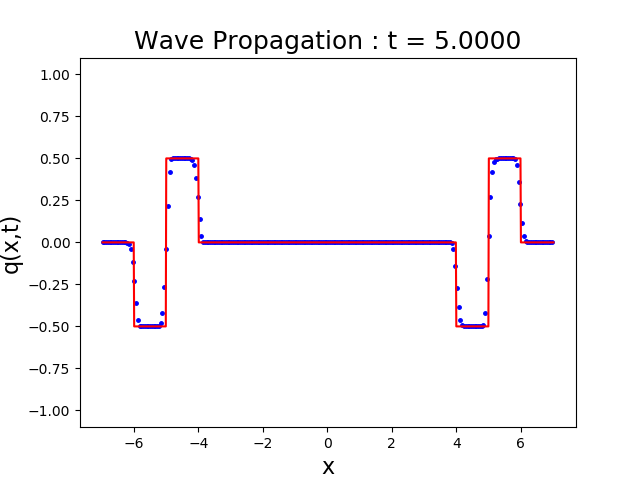

In [8]:
fig = figure(1)
clf()

mq = 1  # Component to plot (0,1,..., meqn-1)

q0 = Q[:,mq,0]
hdl, = plot(xc,q0,'b.',markersize=5)

xfe = linspace(ax,bx,1000)
xfc = xfe[:-1] + dx/2
qe = qinit(xfc,meqn)
hdl_exact, = plot(xfc,qe[:,mq],'r-')

tstr = 'Wave Propagation : t = {:.4f}'
htitle = title(tstr.format(0),fontsize=18)


for i,t in enumerate(tvec):
    q = Q[:,mq,i]
    
    hdl.set_ydata(q)

    qe = qexact(xfc,t,meqn)
    hdl_exact.set_ydata(qe[:,mq])
    
    xlabel('x',fontsize=16)
    ylabel('q(x,t)',fontsize=16)
    htitle.set_text(tstr.format(t))
    
    ylim([-1.1,1.1])
    pause(0.1)

    fig.canvas.draw()        